In [1]:
import os
datadir = 'adsb_data/20181210_jfk24h'
os.chdir(datadir)


In [2]:

import json
import pprint
import codecs
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


pp = pprint.PrettyPrinter(indent=2)
files = os.listdir('.')

In [3]:
class flight:
    def __init__(self, id):
        self.id = id
        self.lats = list()
        self.longs = list()
        self.time = list()
        # self.gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(lats, longs))


def pf(fname):
    with codecs.open(fname, 'r', encoding='utf-8', errors='ignore') as rf:
        sf = rf.readline()
    fdata = json.loads(sf)
    return fdata
    
    
      

In [4]:
ftable = dict() # std::unordered_map<int, flight>
max_long = float('-inf')
min_long = float('inf')
max_lat = float('-inf')
min_lat = float('inf')

lb_long = 38.0
ub_long = 46.0
ub_lat  = -75.0
lb_lat  = -75.0  
for fname in files:
    f1data = pf(fname)
    for fobj in f1data['acList']:
        if fobj['Id'] not in ftable:
            ftable[fobj['Id']] = flight(fobj['Id'])

        max_long = max(max_long, fobj['Long'])
        min_long = min(min_long, fobj['Long'])
        max_lat =  max(max_lat, fobj['Lat'])
        min_lat =  min(min_lat, fobj['Lat'])

        ftable[fobj['Id']].lats.append(fobj['Lat'])
        ftable[fobj['Id']].longs.append(fobj['Long'])
        ftable[fobj['Id']].time.append(fobj['PosTime'])
        

print(f"max_long: {max_long}, min_long: {min_long}, max_lat: {max_lat}, min_lat: {min_lat}")



max_long: -73.3912, min_long: -74.170349, max_lat: 40.9382, min_lat: 40.345893


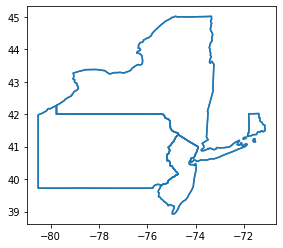

In [5]:
states = gpd.read_file('../../us-data/usa-states-census-2014.shp')
states = states.to_crs("EPSG:4326")
# states.boundary.plot()
# states[(states['NAME'] == 'New York')].plot(figsize=(12,12))
states[states['STUSPS'].isin(['NJ', 'NY', 'PA', 'RI'])].boundary.plot()

colors = ['red', 'green', 'blue', 'black', 'yellow', 'pink']

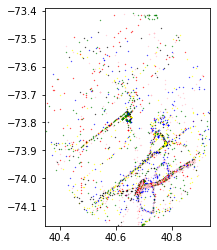

In [6]:
# ax = states[states['STUSPS'].isin(['NJ', 'NY', 'PA', 'RI'])].plot(color = 'white', edgecolor = 'black')
ax = plt.axes(xlim=[min_lat, max_lat], ylim=[min_long, max_long])
i = 0
for _, v in ftable.items():
    gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(v.lats[0:1000], v.longs[0:1000]))
    gdf.plot(ax=ax, color=colors[v.id % len(colors)], markersize=0.1)
    if i >= 100:
        break
    i += 1
